<h1 style="text-align: center;">TP2 Computational Statistique</h1>
<h3 style="text-align: left;">√âtudiant : Gravier Thomas <span style="float: right;">Professeure : St√©phanie Allassonni√®re</span></h3>



# Import

In [3]:
import sklearn as sk
from sklearn.utils import check_random_state




# Exercice 1 :

## Question 2 :

En se r√©f√©rent √† notre r√©ponse de la question 1 on peut impl√©menter l'algorithme ci dessous : 

In [4]:

# Exemple :
# leurs probabilit√©s associ√©es


p = {0.2,0.5,0.3}

# Pour s'adapter √† l'exercice 2 on ne donne que p a notre fonction et il nous renverra l'indice du reel dans l'ensemble
# qui sera repr√©sent√© par une liste X

In [199]:
from sklearn.utils import check_random_state

def discrete_random_var(n, p) : 
    
    sample = [] 
    u = np.random.uniform(0,1,n)
    F = [*[0.0], *np.cumsum(p)] 
    
    for i in range(n): 
        sample.append(np.where(F <= u[i])[0][-1])

    return(sample)

## Question 3 :

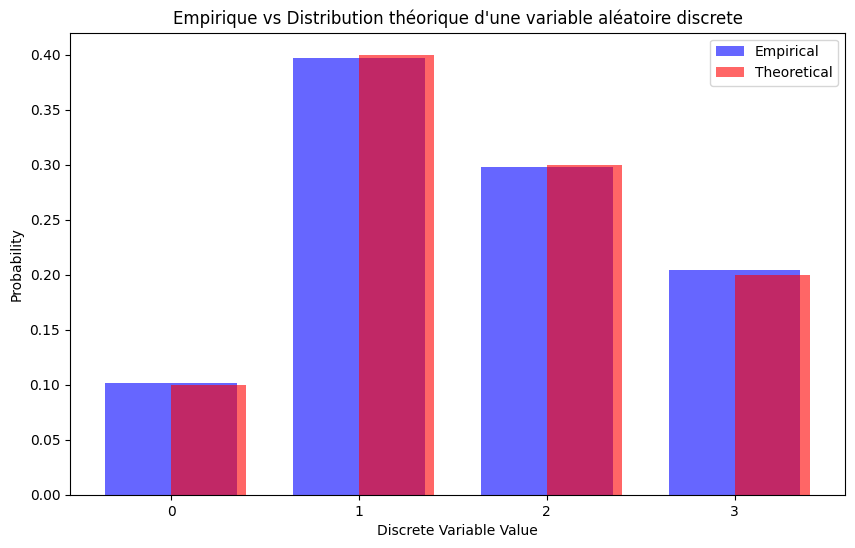

In [6]:
import numpy as np
import matplotlib.pyplot as plt



# Param√®tres
n = 10000  # nombre d'√©chantillons
p = [0.1, 0.4, 0.3, 0.2]  # Probabilit√©s

# G√©n√©ration des √©chantillons
samples = discrete_random_var(n, p)




plt.figure(figsize=(10, 6))
plt.hist(samples, bins=np.arange(len(p) + 1) - 0.5, density=True, alpha=0.6, color='b', label="Empirical", rwidth=0.7)
plt.xticks(range(len(p)), range(len(p)))

# Histogramme th√©orique
plt.bar(np.arange(len(p)) + 0.2, p, alpha=0.6, color='r', width=0.4, label="Theoretical")

# L√©gendes et affichage
plt.xlabel("Discrete Variable Value")
plt.ylabel("Probability")
plt.legend()
plt.title("Empirique vs Distribution th√©orique d'une variable al√©atoire discrete")
plt.show()


Interpr√©tation :

# Exercice 2 :

## Question 2 :

In [209]:
import numpy as np

# On impl√©mente

n = 10000 # nombre de points g√©n√©r√©s

alpha = np.array([0.3,0.2,0.5])# Probabilit√© d'√™tre g√©n√©r√© par une gaussienne ou une autre

mu = np.array([[5,1.2],[0,0],[1.5,8.9]]) # Param√®tre des moyennes

# Matrice de covariance al√©atoire 1
C1 = np.array([[2.3, 0.8], 
               [0.8, 1.5]])

# Matrice de covariance al√©atoire 2
C2 = np.array([[1.7, -0.4], 
               [-0.4, 2.2]])

# Matrice de covariance r√©duite (matrice identit√©)
C3 = np.array([[1, 0], 
               [0, 1]])

# Regrouper les matrices dans un array nomm√© 'cov'
cov = np.array([C1, C2, C3]) # Param√®tre des covariances

X = []

classe_sample = discrete_random_var(n,alpha)

def sample_mixture(classe_sample, mu,cov):
    X = []
    for classe in classe_sample:
    
        X.append(np.random.multivariate_normal(mu[classe],cov[classe]))
    X= np.vstack(X)
    return X.transpose()

X = sample_mixture(classe_sample,mu, cov)

In [211]:
X

array([[ 3.48880771,  1.2246311 , -1.19281625, ...,  4.92689931,
         2.10699729,  0.06016301],
       [-0.53902281,  7.55151754, -0.31405873, ...,  0.69661495,
        -2.65280718, -0.96661473]])

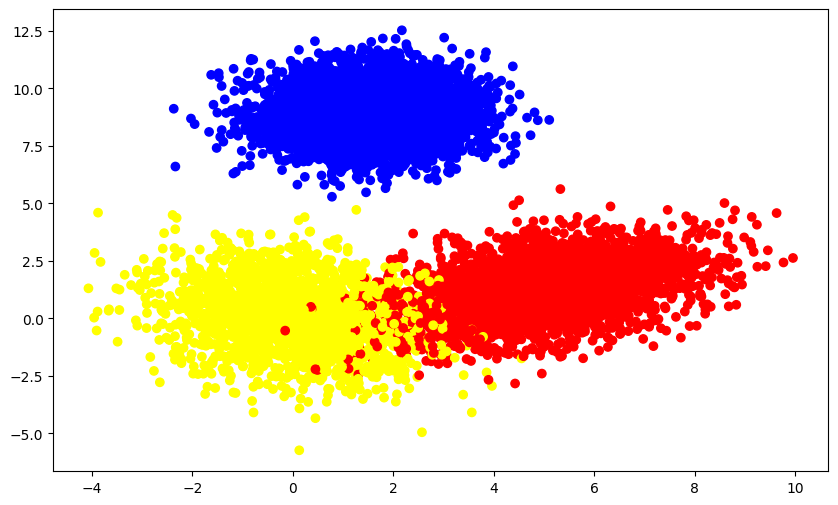

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10,6))

couleur = np.array(['red','yellow','blue'])
plt.scatter(X[0,:],X[1,:], c= couleur[classe_sample] )

plt.show()

## Question 3 :

On cr√©e une fonction qui prends les points X g√©n√©r√© pr√©cedement et on veut les reclassifi√©s comme ci dessus

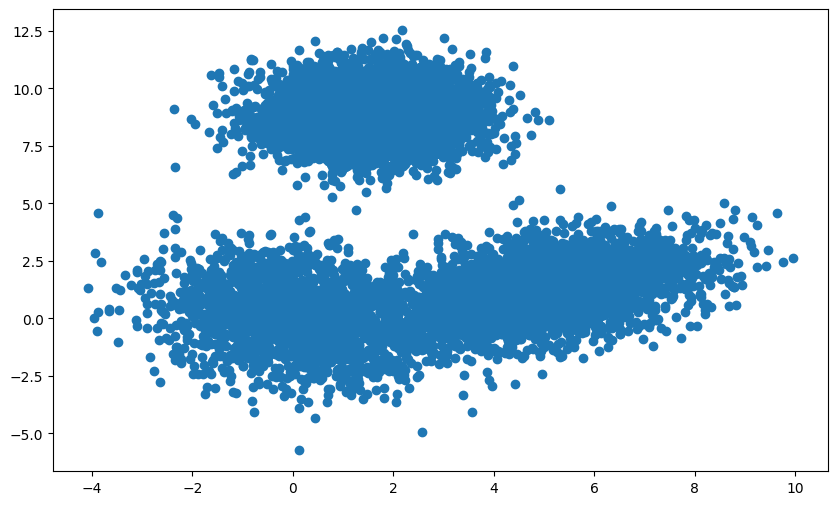

In [213]:
plt.figure(figsize= (10,6))
plt.scatter(X[0,:],X[1,:])
plt.show()

On remarque que les clusters se distingue moins facilement. Pour classifier nous allons utiliser l'algorithme EM en initialisant les diff√©rents vecteur avec kmeans. Pour les besoins de l'exercice nous supposerons qu'il y a 3 clusters.

In [214]:
X.shape

(2, 10000)

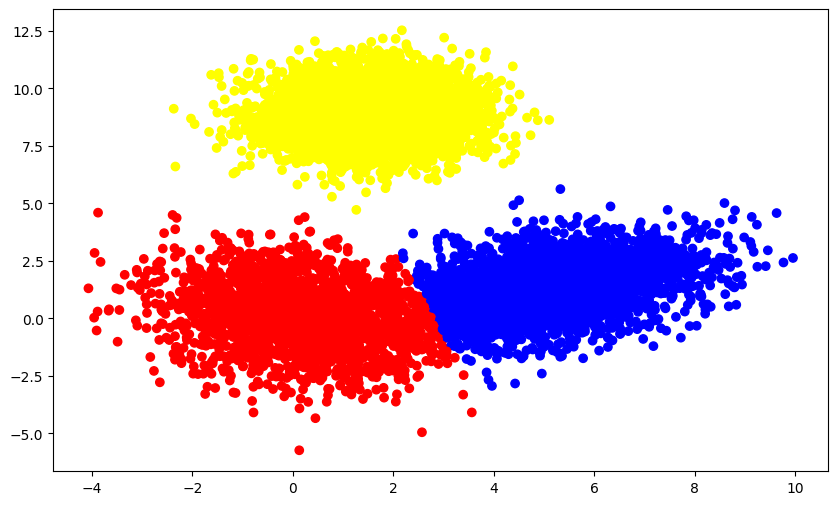

In [215]:
from sklearn.cluster import KMeans


X_kmeans = X.transpose()

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_kmeans)


plt.figure(figsize= (10,6))
plt.scatter(X_kmeans[:,0],X_kmeans[:,1], c = couleur[kmeans.labels_])
plt.show()

Kmeans initialise assez bien les centres des clusters mais nous allons am√©lior√©s √ßa avec l'algorithme EM appliqu√© a un GMM

In [216]:
X.shape

(2, 10000)

In [217]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

# Hyperparam√®tres
#m = 3  # nombre de clusters
#d = 2  # dimension des vecteurs

#kmeans_init = kmeans.labels_  # labels assign√©s par k-means
#nb_point = X.shape[1]  # nombre de points

# Initialisation de tau_0 avec des z√©ros
#tau = np.zeros((m, nb_point))

# Pour chaque point, on place un 1 dans la ligne correspondant √† son cluster
#tau[kmeans_init,np.arange(nb_point)] = 1

import numpy as np
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

def init_EM(X, m):
    X_kmeans = X.T  # Transposition pour correspondre aux dimensions attendues
    kmeans = KMeans(n_clusters=m, random_state=0, n_init="auto").fit(X_kmeans)
    kmeans_init = kmeans.labels_
    nb_point = X.shape[1]  # Nombre de points dans X

    # Initialisation de tau_0 avec des z√©ros
    tau = np.zeros((m, nb_point))

    # Pour chaque point, on place un 1 dans la ligne correspondant √† son cluster
    tau[kmeans_init, np.arange(nb_point)] = 1

    return tau

def step_M(tau, X):
    d = X.shape[0]  # Dimension des vecteurs
    m = tau.shape[0]  # Nombre de clusters
    nb_point = X.shape[1]  # Nombre de points

    n_repart = np.sum(tau, axis=1)  # Nombre de points par cluster
    alpha = n_repart / nb_point  # R√©partition des gaussiennes

    mu = np.zeros((d, m))
    cov = np.zeros((m, d, d))

    for k in range(m):
        if n_repart[k] > 0:  # √âviter la division par z√©ro
            mu[:, k] = np.sum(tau[k, :] * X / n_repart[k], axis=1)
            
            diff = X - mu[:, k].reshape(d, 1)
            weighted = tau[k, :] * diff
            cov[k] = weighted @ diff.T / n_repart[k]


    return alpha, mu, cov

def log_likelihood(densite):
    log_lh = np.sum(np.log(np.sum(densite, axis=0)))
    return log_lh

def compute_densite(alpha, mu, cov, X):
    d = X.shape[0]
    nb_points = X.shape[1]

    densite = []

    for idx, (mean, covariance) in enumerate(zip(mu.T, cov)):
        mn = multivariate_normal(mean=mean, cov=covariance)
        densite_mc = alpha[idx] * mn.pdf(X.T)  # Calcul des densit√©s pour chaque point de X
        densite.append(densite_mc)

    densite = np.vstack(densite)  # Conversion en array pour faciliter les calculs

    return densite

def compute_tau(densite):
    tau = densite / np.sum(densite, axis=0)  # Normalisation pour obtenir les probabilit√©s
    return tau

def algorithme_EM(X, nb_cluster, eps):
    d = X.shape[0]
    m = nb_cluster

    tau_0 = init_EM(X, m)
    alpha_0, mu_0, cov_0 = step_M(tau_0, X)
    densite_0 = compute_densite(alpha_0, mu_0, cov_0, X)
    log_lh_0 = log_likelihood(densite_0)

    tau = compute_tau(densite_0)
    previous_likelihood = log_lh_0
    liste_lh = [previous_likelihood]
    f=0
    while True:
        alpha, mu, cov = step_M(tau, X)
        densite = compute_densite(alpha, mu, cov, X)

        log_lh = log_likelihood(densite)
        liste_lh.append(log_lh)

        erreur = np.abs(log_lh - previous_likelihood)

        if erreur < eps:
            break

        tau = compute_tau(densite)
        previous_likelihood = log_lh


    return alpha, mu, cov, tau, liste_lh


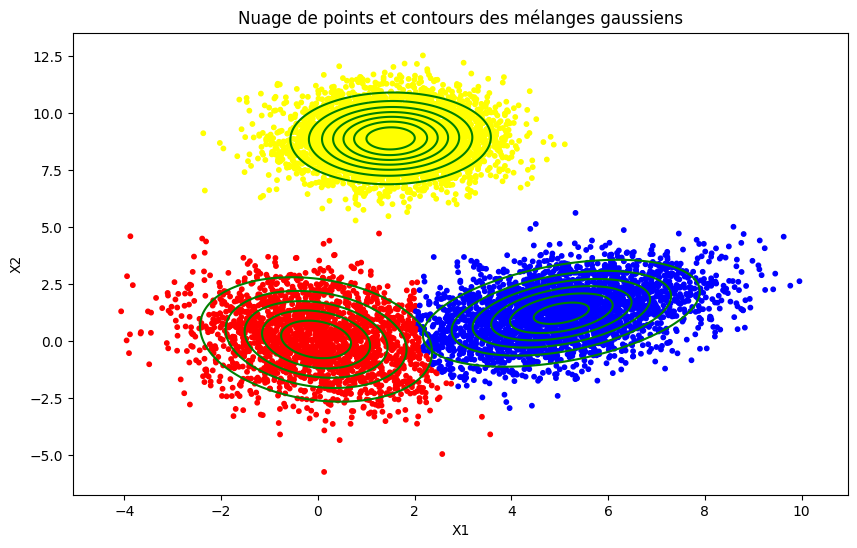

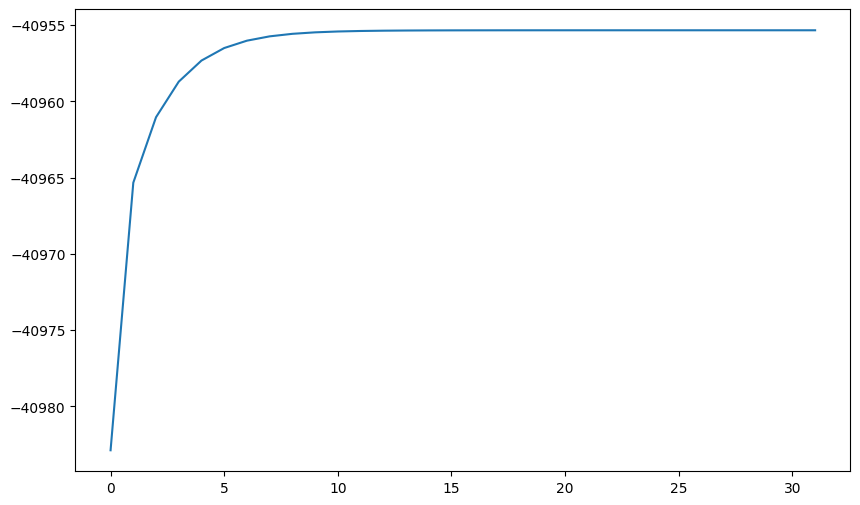

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

alpha_em, mu_em, cov_em ,tau_em, liste_lh = algorithme_EM(X, 3, 1E-6)

classe = np.argmax(tau_em,axis=0)
couleur = np.array(['red','yellow','blue','grey','brown','purple'])


mu_em = mu_em.T

# Exemple de donn√©es du m√©lange gaussien
# Assurez-vous que `alpha`, `mu` et `cov` sont d√©finis

# Nuage de points
plt.figure(figsize=(10, 6))





plt.scatter(X[0, :], X[1, :], c=couleur[classe], label='Nuage de points', s=10)

# D√©finir les limites pour les contours
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.dstack((x, y))

# Dessiner chaque composante du m√©lange gaussien
for i in range(len(alpha_em)):
    rv = multivariate_normal(mean=mu_em[i], cov=cov_em[i])
    plt.contour(x, y, rv.pdf(pos), levels=7, colors='green', linewidths=1.5)

# Affichage final

plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Nuage de points et contours des m√©langes gaussiens")
plt.show()

# Nuage de points
plt.figure(figsize=(10, 6))

plt.plot(liste_lh)
plt.show()


## Question 4 :

In [219]:
print("R√©sultats de l'algorithme EM et des valeurs initiales :")
print("\nVecteurs de moyennes :")
print(f"  - Vecteur de moyenne de EM : {mu_em}")
print(f"  - Vecteur de moyenne initial : {mean}")

print("\nMatrices de covariances :")
print(f"  - Matrice de covariance de EM : {cov_em}")
print(f"  - Matrice de covariance initiale : {cov}")

print("\nVecteurs alpha :")
print(f"  - Vecteur alpha de EM : {alpha_em}")
print(f"  - Vecteur alpha initial : {alpha}")


R√©sultats de l'algorithme EM et des valeurs initiales :

Vecteurs de moyennes :
  - Vecteur de moyenne de EM : [[-0.03637751  0.07095678]
 [ 1.50460718  8.88779152]
 [ 5.03383263  1.2190568 ]]
  - Vecteur de moyenne initial : 0.8

Matrices de covariances :
  - Matrice de covariance de EM : [[[ 1.62379776 -0.38468371]
  [-0.38468371  2.10252601]]

 [[ 1.03884195  0.02786803]
  [ 0.02786803  0.97890502]]

 [[ 2.1944146   0.73275219]
  [ 0.73275219  1.47331699]]]
  - Matrice de covariance initiale : [[[ 2.3  0.8]
  [ 0.8  1.5]]

 [[ 1.7 -0.4]
  [-0.4  2.2]]

 [[ 1.   0. ]
  [ 0.   1. ]]]

Vecteurs alpha :
  - Vecteur alpha de EM : [0.19825344 0.50381144 0.29793511]
  - Vecteur alpha initial : [0.3 0.2 0.5]


Nous observons que les valeurs obtenues sont tr√®s proches des valeurs initiales, avec une pr√©cision de l'ordre de \(10^{-3}\),  avec notre choix d'utiliser 3 clusters et un crit√®re de convergence bas√© sur un epsilon de \(10^{-6}\) appliqu√© √† la log-vraisemblance.


## Question 5 :

In [37]:
import pandas as pd

In [77]:
df = pd.read_csv('WPP2024_Demographic_Indicators_Medium.csv', low_memory=False)[['CBR', 'CDR']].dropna()
X = df.to_numpy()
X= X.T

In [94]:
alpha_em, mu_em, cov_em ,tau_em, liste_lh = algorithme_EM(X, 3, 1E-6)

classe = np.argmax(tau_em, axis=0)
couleur = np.array(['red', 'yellow', 'blue', 'grey', 'brown', 'purple'])

mu_em = mu_em.T

In [89]:
point_colors

array([[2.61124111e-020, 6.97365816e-170, 1.00000000e+000],
       [4.50643710e-019, 3.73799969e-168, 1.00000000e+000],
       [4.21072479e-018, 2.02311057e-167, 1.00000000e+000],
       ...,
       [1.29062959e-005, 9.99987094e-001, 3.74700790e-016],
       [8.70273367e-006, 9.99991297e-001, 4.08294197e-016],
       [5.98840202e-006, 9.99994012e-001, 4.58997276e-016]])

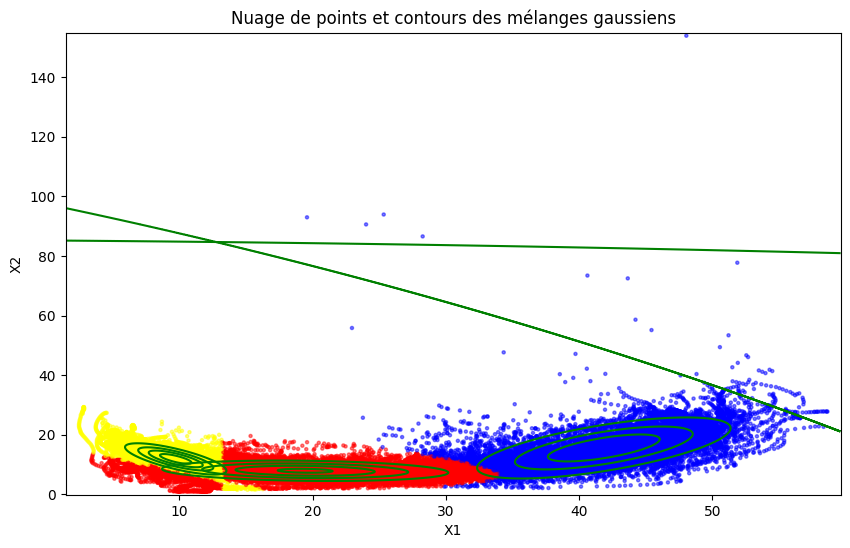

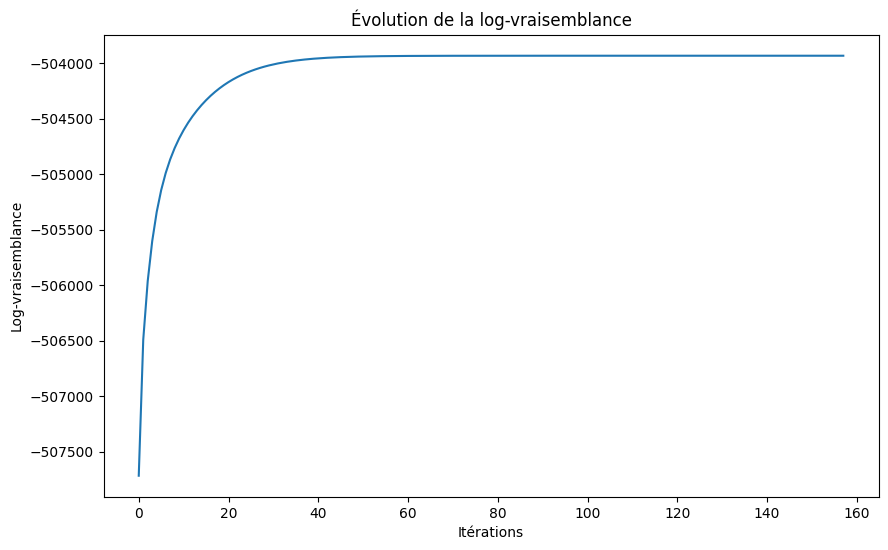

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.patches as patches


# Nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(X[0, :], X[1, :], c=couleur[classe], label='Nuage de points', s=5,alpha=0.5)

# D√©finir les limites pour les contours
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.dstack((x, y))

# Seuil de distance pour dessiner les ellipses
distance_seuil = 0.05  # Ajustez ce seuil selon vos besoins

# Dessiner chaque composante du m√©lange gaussien avec des ellipses
for i in range(len(alpha_em)):
    rv = multivariate_normal(mean=mu_em[i], cov=cov_em[i])
    plt.contour(x, y, rv.pdf(pos), levels=4, colors='green', linewidths=1.5)
    
    # Calculer la distance moyenne des points du cluster par rapport au centre
    distances = np.linalg.norm(X[:, classe == i].T - mu_em[i], axis=1)
    distance_moyenne = np.mean(distances)
    
    # Ajouter des ellipses seulement si la distance moyenne est inf√©rieure au seuil
    if distance_moyenne <= distance_seuil:
        eigvals, eigvecs = np.linalg.eigh(cov_em[i])
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigvals)
        
        ellipse = patches.Ellipse(mu_em[i], width, height, angle=angle, edgecolor='green', facecolor='none', linewidth=1.5)
        plt.gca().add_patch(ellipse)

# Affichage final
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Nuage de points et contours des m√©langes gaussiens")
plt.show()

# Affichage de la courbe de log-vraisemblance
plt.figure(figsize=(10, 6))
plt.plot(liste_lh)
plt.xlabel("It√©rations")
plt.ylabel("Log-vraisemblance")
plt.title("√âvolution de la log-vraisemblance")
plt.show()


Avec 3 clusters, on observe que les taux de natalit√© et de mortalit√© varient en fonction du pays et de la p√©riode consid√©r√©e. On peut identifier un groupe caract√©ris√© par une "faible mortalit√© et faible natalit√©" √† gauche, un autre avec une "forte mortalit√© et forte natalit√©", et un troisi√®me pr√©sentant une "faible mortalit√© et une natalit√© moyenne". L'algorithme EM permet ainsi de classer les donn√©es de mani√®re compr√©hensible et interpr√©table.

### S√©lection de mod√®le - Bayesian Information Criterion

On compte le nombre de param√®tres et degr√©s de libert√©s d'un mod√®le de m√©lange gaussien avec $p$ composantes : 
- $\alpha_j : p$ param√®tres avec la contrainte $\displaystyle\sum_{j=1}^p{\alpha_j} = 1$ d'o√π  l'on tire $p-1$ degr√©s de libert√©s.
- $\mu_j : p\times d$ param√®tres ind√©pendants d'o√π $p\times d$ degr√©s de libert√©s.
- $\Sigma_j : \displaystyle p\times d^2 $ param√®tres avec la contrainte $\Sigma^T = \Sigma$ d'o√π $ p\times \frac{d(d+1)}{2}$ degr√©s de libert√©s.

Le nombre total de degr√©s de libert√©s est donc $p\times(d+1)\times(d + 2)/2 - 1$

In [113]:
def bic(alpha, mu, cov, lh, X):

    log_lh = lh

    # Calcul du nombre de param√®tres
    p = len(alpha)
    d = X.shape[0]

    # Nombre de degr√©s de libert√© total
    num_params = p * (d + 1) * (d + 2) / 2 - 1

    # Calcul du BIC
    n = X.shape[1]  # Nombre de points de donn√©es
    bic_value = -(log_lh - (num_params / 2) * np.log(n))

    return bic_value

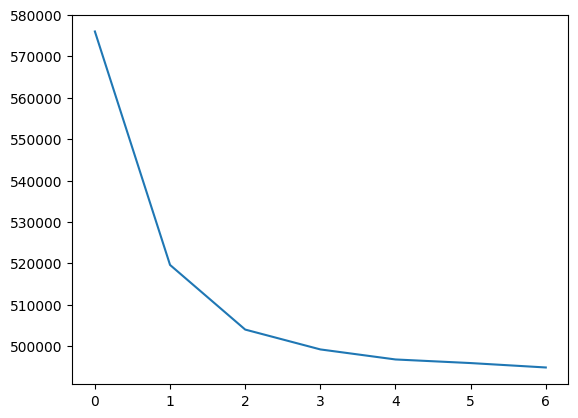

In [115]:
cluster_max = 8

bics = []

for i in range(1,cluster_max):

    alpha_em, mu_em, cov_em ,_, liste_lh = algorithme_EM(X, i, 1E-6)
    bic_i = bic(alpha_em, mu_em, cov_em, liste_lh[-1], X)
    bics.append(bic_i)

plt.plot(bics)
plt.show()

    

On constate ainsi que, plus la valeur de $p$ augmente, plus le mod√®le s'adapte √† notre jeu de donn√©es. Toutefois, le crit√®re BIC n'emp√™che pas le ph√©nom√®ne de sur-apprentissage. N√©anmoins, on remarque que ce crit√®re atteint un plateau √† partir de $p=3$, ce qui sugg√®re que le mod√®le avec 3 composantes est le plus simple et le mieux ajust√© aux donn√©es.

Le trac√© avec 3 clusters est pr√©sent√© ci-dessus. J'ai assign√© les points en fonction de l'argmax de leurs vecteurs $\tau$. Une alternative aurait √©t√© de r√©aliser un d√©grad√© de couleurs repr√©sentant la probabilit√© d'appartenance de chaque point √† un cluster. Cependant, j'ai rencontr√© un probl√®me avec le trac√© des ellipses de contours : celles-ci incluent les points aberrants, et je n'arrive pas √† supprimer les contours non significatifs.








# Exercise 3: Importance sampling

## Question 1 :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def f(x):

    return 2 * np.sin(np.pi/1.5 * x) * (x>=0)

def p(x):

    return x**(1.65-1) * np.exp(-0.5*x**2) * (x>=0)




def q(x,mu,sigma_carre):

    rv = norm(mu,np.sqrt(sigma_carre))

    return  2* rv.pdf(x)  * (x>=0)



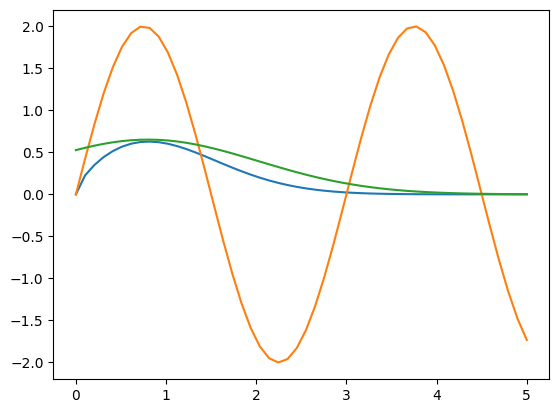

In [3]:
x= np.linspace(0,5)
plt.plot(x,p(x))
plt.plot(x,f(x))
plt.plot(x,q(x,0.8,1.5))
plt.show()


In [57]:
from scipy.stats import norm
import numpy as np
import seaborn as sn

# On s'assure d'avoir une fonction optimiser qui sample que des nombres positif avec sampled_from_q fonction recursive

def sampled_from_q(mu, sigma_carre, N):

    rv = norm(mu, np.sqrt(sigma_carre))
    samples = 2*rv.rvs(N)


    def remove_and_replace_negatives(samples):
        negative_samples = samples[samples < 0]
        
        if len(negative_samples) > 0:

            samples = samples[samples >= 0]

            additional_samples = 2*rv.rvs(len(negative_samples))
            # Combine non-negative additional samples recursively
            return remove_and_replace_negatives(np.concatenate((samples, additional_samples)))
        else:
            return samples


    samples = remove_and_replace_negatives(samples)

    return np.array(samples)







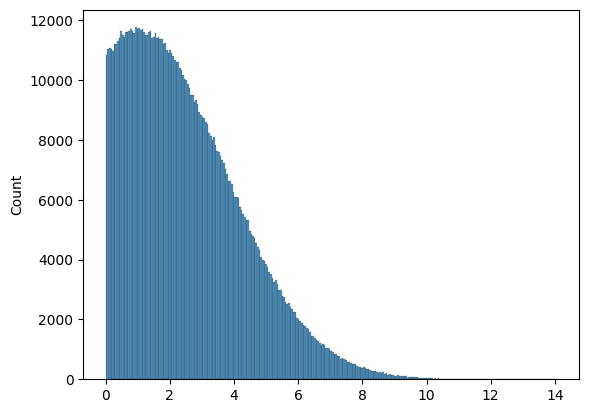

In [58]:
sn.histplot(sampled_from_q(0.5,1.8,1000000))
plt.show()

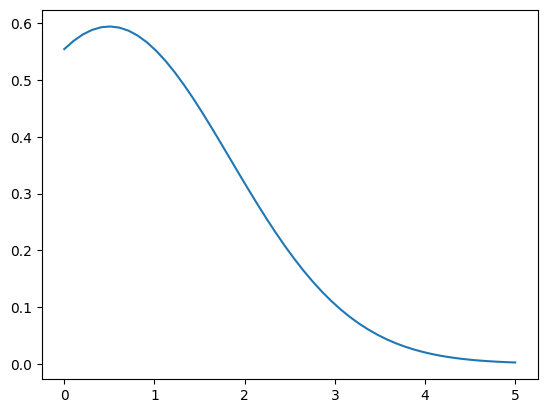

In [59]:
plt.plot(np.linspace(0,5),q(np.linspace(0,5),0.5,1.8))
plt.show()

La distribution sur laquel on sample est la bonne au vue de l'histogramme.

In [82]:
def compute_estimateur(N_samples, mu, sigma_carre):
   

    
    samples = sampled_from_q(mu, sigma_carre, N_samples)
    
    rv = norm(mu, np.sqrt(sigma_carre))      
    p_x = p(np.array(samples))
    q_x = 2*rv.pdf(np.array(samples))
    f_x = f(np.array(samples))
    w = p_x / q_x


    weight_norm = w/np.mean(w)
    estimateur = np.mean(weight_norm*f_x)
    
    
    

    return estimateur

In [83]:
mu = 0.8
sigma_carre = 1.5
compute_estimateur(100000, mu, sigma_carre)

0.47337907018493114

La fonction pour effectuer le Poor Importance Sampling est compute_estimateur qui prends en argument le nombre d'√©chantillons.

## Question 2 : 

On cr√©e une fonction qui cr√©e une liste d'estimateur.

In [97]:

def liste_estimateur(N,mu, sigma_carre):
    
    estimateur_liste = []

    for i in range(500): # 500 estimateurs sont consid√©r√©s comme suffisant pour avoir la moyenne et la variance.

        
        
    

        
        
        estimateur = compute_estimateur(N,mu,sigma_carre)
        estimateur_liste.append(estimateur)
        
    return estimateur_liste


Puis, nous utilisons la fonction pour obtenir 500 estimateurs, ce qui nous permet de calculer la moyenne et la variance pour diff√©rentes valeurs d'√©chantillonnage 
ùëÅ

In [99]:
N = [10, 100, 1000, 10000]

mu, sigma_carre = 0.8, 1.5


mean_estimateur = []
var_estimateur = []

for n in N:

    estimateur_liste = liste_estimateur(n,mu,sigma_carre)
    mean_estimateur.append(np.mean(estimateur_liste))
    var_estimateur.append(np.var(estimateur_liste))
                           
    

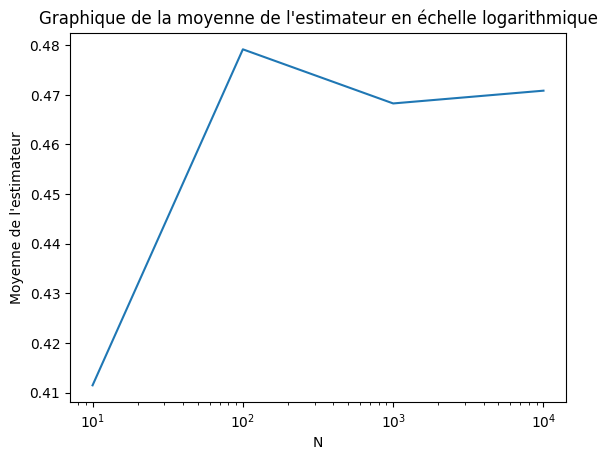

In [100]:
plt.semilogx(N, mean_estimateur)
plt.xlabel('N')
plt.ylabel("Moyenne de l'estimateur")
plt.title("Graphique de la moyenne de l'estimateur en √©chelle logarithmique")
plt.show()

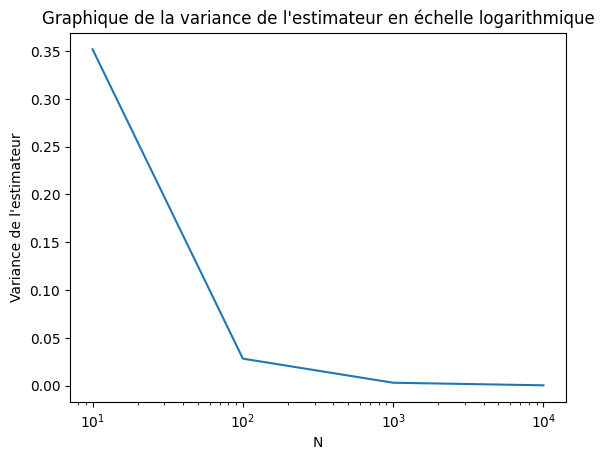

In [101]:
plt.semilogx(N, var_estimateur)  # Utilise directement une √©chelle logarithmique pour l'axe y
plt.xlabel('N')
plt.ylabel("Variance de l'estimateur")
plt.title("Graphique de la variance de l'estimateur en √©chelle logarithmique")
plt.show()


## Question 3 :

Comme mentionn√© dans l'√©nonc√© de la question, nous effectuons la modification en utilisant $\mu$ = 6.


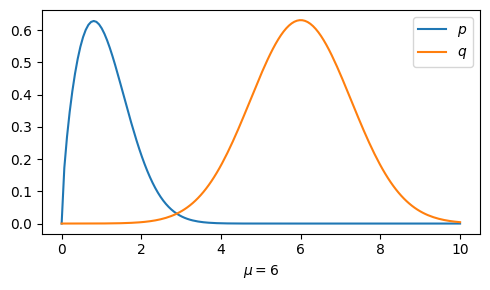

In [102]:
x = np.linspace(0, 10, 150)
plt.figure(figsize=(5,3))
plt.plot(x, p(x), label=r'$p$')
plt.plot(x, q(x, 6, 1.6), label=r'$q$')
plt.xlabel(r'$\mu=6$')
plt.legend()
plt.tight_layout()
plt.show()

### Question 3.1 :

On refait l'exp√©rience avec $\mu$ = 6

In [103]:
N = [10, 100, 1000, 10000]

mu = 6
sigma_carre = 1.5


mean_estimateur = []
var_estimateur = []

for n in N:

    estimateur_liste = liste_estimateur(n,mu,sigma_carre)
    mean_estimateur.append(np.mean(estimateur_liste))
    var_estimateur.append(np.var(estimateur_liste))
                           
    

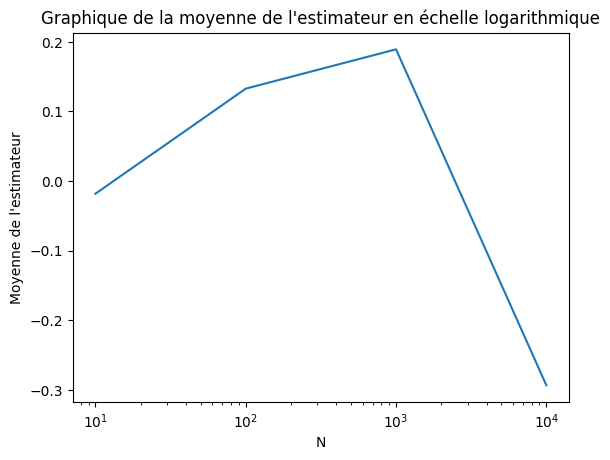

In [104]:
plt.semilogx(N, mean_estimateur)
plt.xlabel('N')
plt.ylabel("Moyenne de l'estimateur")
plt.title("Graphique de la moyenne de l'estimateur en √©chelle logarithmique")
plt.show()

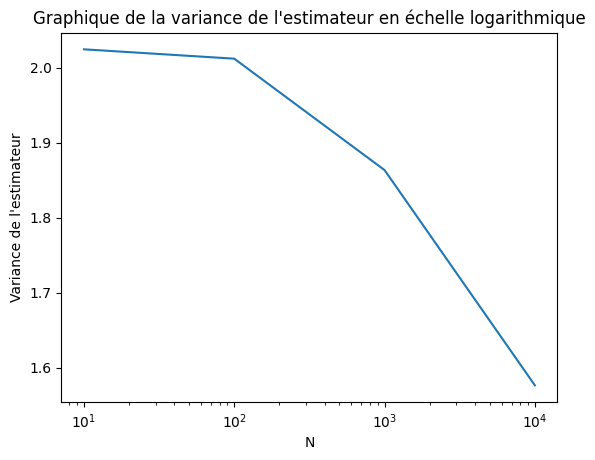

In [105]:
plt.semilogx(N, var_estimateur)  # Utilise directement une √©chelle logarithmique pour l'axe y
plt.xlabel('N')
plt.ylabel("Variance de l'estimateur")
plt.title("Graphique de la variance de l'estimateur en √©chelle logarithmique")
plt.show()


### Question 3.2 :

In [141]:
N = 1000
means = [0.8, 6]
sigma_carre = 1.5

def compute_weights(N_samples, mu, sigma_carre):
   

    
    samples = sampled_from_q(mu, sigma_carre, N_samples)
    
    rv = norm(mu, np.sqrt(sigma_carre))      
    p_x = p(np.array(samples))
    q_x = 2*rv.pdf(np.array(samples))
    f_x = f(np.array(samples))
    w = p_x / q_x


    weight_norm = w/np.mean(w)

    
    
    

    return weight_norm, samples

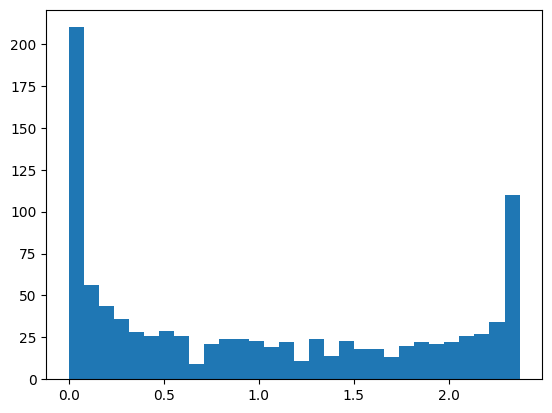

In [142]:
weights0, x_0 = compute_weights(N, means[0], sigma_carre)

# Affichez l'histogramme avec les bacs sp√©cifi√©s
plt.hist(weights0, bins=30)
plt.show()

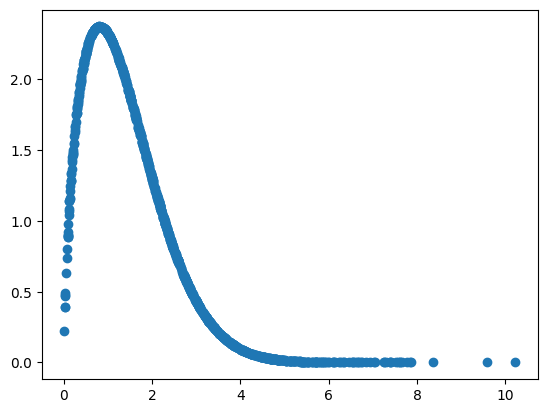

In [144]:
plt.scatter(x_0, weights0)
plt.show()

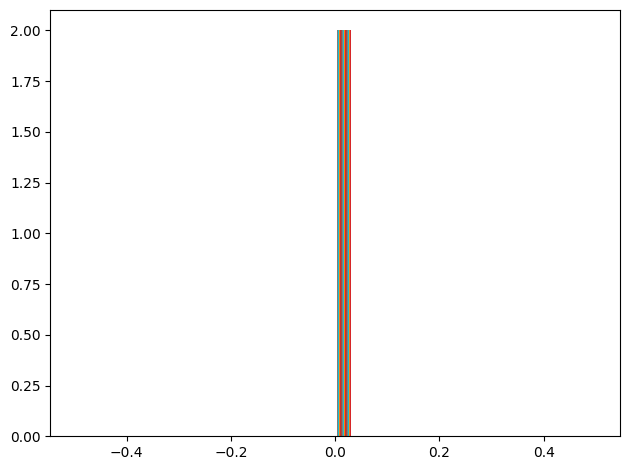

In [140]:
weights1, x_1 = compute_weights(N, means[1], sigma_carre)

# Affichez l'histogramme avec les bacs sp√©cifi√©s
plt.hist(weights, bins=30)
plt.tight_layout()
plt.show()

In [149]:
weights1, x_1 = compute_weights(N, means[1], sigma_carre)

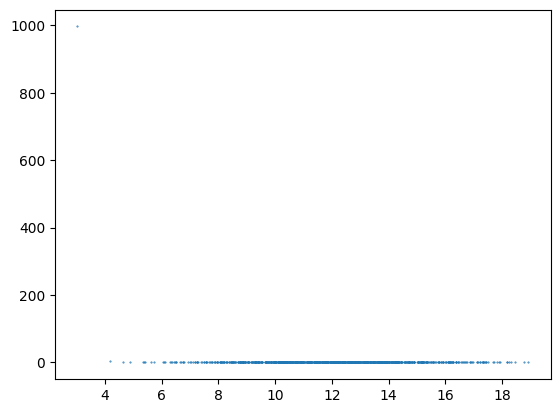

In [153]:
plt.scatter(x_1, weights1, s=0.2)
plt.show()

Pour conclure sur l'**importance sampling** poor, on observe que le choix de la distribution est crucial. Il est n√©cessaire de choisir une distribution dont la densit√© est concentr√©e l√† o√π se trouve le plus d'information dans la fonction √† √©chantillonner. Ce n'est pas le cas avec notre distribution pour \\(\mu = 6\\), mais cela l'est beaucoup plus avec \\(\mu = 0.8\\).


## Question 4 :

> (iii) $\Longleftrightarrow$ Maximiser $\sum_{i=1}^n \tilde{w_i}^{(0)} \log (\sum_{j=1}^M \alpha_j \phi(X_i^{(0)};\theta_j))$

<br><br>

> Ce qui est une approximation pour l‚Äô√©tape : Maximisation $\int \log(\sum_{i=1}^M \alpha_i \phi(x,\mu_i, \Sigma_i)) ~\nu(x)~ dx$

<br><br>

> Cette maximisation ressemble formellement √† l‚Äôestimation du maximum de vraisemblance standard pour un m√©lange, mais avec une int√©gration par rapport √† $\nu$ rempla√ßant la somme empirique sur les observations.

<br><br>

> Cette analogie sugg√®re qu‚Äôil est possible de maximiser le crit√®re pr√©c√©dent en utilisant l‚Äôalgorithme EM. Cependant, les param√®tres ont chang√© pour inclure les valeurs des poids.

<br><br>

> Ainsi, nous avons :

<br><br>

$$\alpha_c = \frac{\sum_i \tau_{ic}\tilde{w_i}}{\sum_c \sum_i \tau_{ic}\tilde{w_i}}$$

<br><br>

$$\mu_c = \frac{\sum_i \tau_{ic}\tilde{w_i} x_i}{\sum_i \tau_{ic}\tilde{w_i}}$$

<br><br>

$$\sigma_c = \frac{\sum_i \tau_{ic}\tilde{w_i} (x_i - \mu_c)^T(x_i - \mu_c)}{\sum_i \tau_{ic}\tilde{w_i}}$$

<br><br>

> Avec $\tau_{ic} = \frac{\alpha_c \phi(x_i | \mu_c,\Sigma_c)}{\sum_{k=1}^K \alpha_k \phi(x_i | \mu_k,\Sigma_k)}$  

<br><br>

O√π : $\phi(x|\mu, \Sigma)$ d√©crit la gaussienne multivari√©e.



## Question 5 :

In [424]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans







def init_mixture(nb_clusters, d):

    alpha = np.zeros((nb_clusters,1))
    alpha[: , 0] = 1/nb_clusters

    mu = np.random.randn(nb_clusters, d) # a voir
    
    cov = np.zeros((nb_clusters, d, d)) + np.eye(d)
    
    return alpha, mu , cov

from sklearn.utils import check_random_state

def discrete_random_var(n, p) :  # fonction de l'exercice 1
    
    sample = [] 
    u = np.random.uniform(0,1,n)
    F = [*[0.0], *np.cumsum(p)] 
    
    for i in range(n): 
        sample.append(np.where(F <= u[i])[0][-1])

    return(sample)

def sample_mixture(classe_sample, mu,cov): # fonction de l'exercice 2
    X = []
    for classe in classe_sample:
    
        X.append(np.random.multivariate_normal(mu[classe],cov[classe]))
    X= np.vstack(X)
    return X.transpose()

def p(X, sigma, d, b):
    X = X.T
    # Sigma 
    Cov = np.eye(d)
    Cov[0,0] = sigma**2
    
    # Null means 
    mu = np.zeros(d)
    
    # Generates density  
    sample = X.copy()
    sample[:,1] -= b*(sample[:,0]**2 - sigma**2) 
    sample = multivariate_normal.pdf(sample, mu, Cov)
    
    return(sample)

# fonction q 
def q(X, alpha, mu, cov) : 
    X = X.T
    aux = np.zeros((X.shape[0], alpha.shape[0]))
    
    for j in range(alpha.shape[0]):
        f = multivariate_normal.pdf(X, mu[j], cov[j], allow_singular=True)
        aux[:,j] = alpha[j] * f
    
    return(np.sum(aux, axis = 1))

# fonction to compute weights 
def weight(X,alpha,mu,cov,sigma,d,b):
    
    p_prob = p(X, sigma, d, b)    
    q_prob = q(X , alpha, mu, cov)
    
    w = p_prob/q_prob 
    w /= np.mean(w)

    return w
        
        



def step_M_modified(tau, w, X):
    d = X.shape[0]  # Dimension des donn√©es
    m = tau.shape[0]  # Nombre de composantes
    nb_point = X.shape[1]  # Nombre de points de donn√©es

    # Multiplier chaque colonne de tau par le poids correspondant
    for k in range(nb_point):
        tau[:, k] *= w[k]

    # Calculer alpha (les poids normalis√©s pour chaque composante)
    alpha = np.sum(tau, axis=1)

    # Initialiser mu et cov
    mu = np.zeros((d, m))
    cov = np.zeros((m, d, d))

    # Calculer mu et cov pour chaque composante
    for k in range(m):
        if alpha[k] > 0:
            # Calcul de mu
            mu[:, k] = np.sum(tau[k, :] * X, axis=1) / alpha[k]
            
            # Calcul de la covariance
            diff = X - mu[:, k].reshape(d, 1)
            weighted_diff = tau[k, :] * diff
            cov[k] = weighted_diff @ diff.T / alpha[k]

    return alpha, mu, cov


def log_likelihood(densite):
    log_lh = np.sum(np.log(np.sum(densite, axis=0)))
    return log_lh

def compute_densite(alpha, mu, cov, X):
    d = X.shape[0]
    nb_points = X.shape[1]

    densite = []

    for idx, (mean, covariance) in enumerate(zip(mu.T, cov)):
        mn = multivariate_normal(mean=mean, cov=covariance, allow_singular=True)
        densite_mc = alpha[idx] * mn.pdf(X.T)  # Calcul des densit√©s pour chaque point de X
        densite.append(densite_mc)

    densite = np.vstack(densite)  # Conversion en array pour faciliter les calculs

    return densite

def compute_tau(densite):
    tau = densite / np.sum(densite, axis=0)  # Normalisation pour obtenir les probabilit√©s
    return tau

def algorithme_EM_IS(nb_cluster, m, b, sigma, n_samples ,n_iter):

    # On initialise
    alpha, mu, cov = init_mixture(nb_cluster,m)

    for i in range(n_iter): # On pourrait l'am√©liorer avec un crit√®re d'arr√™t sur la log-likelihood, mais ce crit√®re simplifie l'algorithme
        # Calcule des poids
        classe_sample = discrete_random_var(n_samples,alpha)
        X = sample_mixture(classe_sample,mu,cov)
        W = weight(X,alpha,mu,cov,sigma,m,b)
        W = np.array(W)
        #E-step

        densite = compute_densite(alpha, mu, cov, X)
        tau = compute_tau(densite)

        #M-step modifi√©e pour IS

        
        alpha, mu, cov = step_M_modified(tau, W, X)

    return alpha, mu, cov, tau




In [450]:
nb_cluster=5
m = 5 # dimension des vecteurs
b= 1
sigma = 1

n_iter = 50
n_samples = 5000





alpha, mu, cov, tau = algorithme_EM_IS(nb_cluster, m, b, sigma, n_samples ,n_iter)   

        

        
        

In [452]:
#alpha, mu, cov, tau = algorithme_EM_IS(nb_cluster, m, b, sigma, n_samples ,n_iter)
classe_sample = discrete_random_var(10000,alpha)
X = sample_mixture(classe_sample,mu,cov)


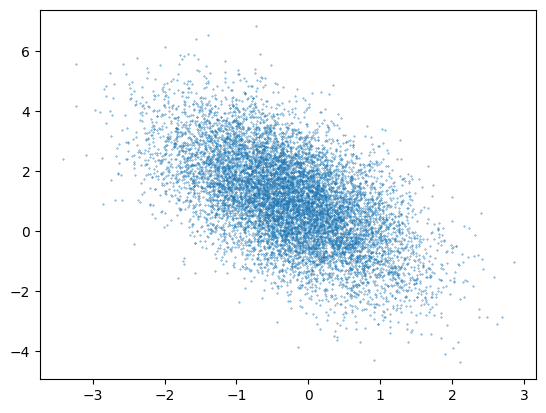

In [455]:
plt.scatter(X[0,:],X[1,:], s=0.1)

Mon algorithme ne fonctionne pas, je n'arrive pas √† trouver l'erreur qui redonne la densit√© en forme de banane.